In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


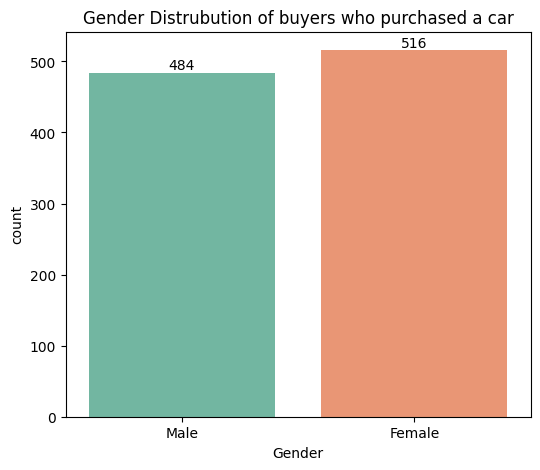

In [14]:
# plotting gender
plt.figure(figsize=(6,5))
plt.title('Gender Distrubution of buyers who purchased a car')
ax = sns.countplot(data=df, x=df['Gender'], palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Gender')
# plt.savefig('gender.png')
plt.show()

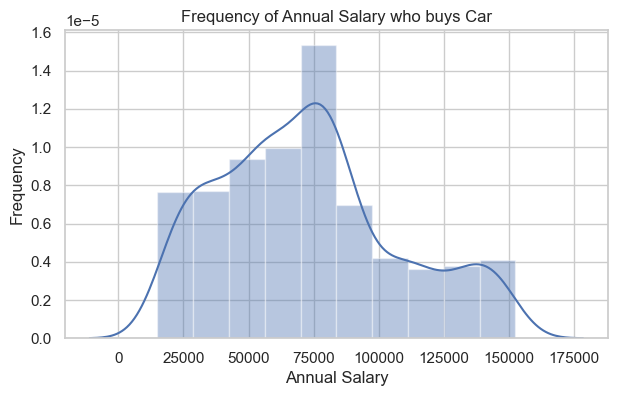

In [16]:
# frequency of salary
plt.figure(figsize=(7, 4))
plt.title('Frequency of Annual Salary who buys Car')
# sns.countplot(data=df, x=df['Outcome'], palette='Set2')
sns.set(style="whitegrid") 
sns.distplot(x=df['AnnualSalary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
# plt.savefig('Salary.png')
plt.show()

In [5]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [7]:
df = df.drop(['User ID'], axis=1)

In [9]:
inputs = df.drop('Purchased', axis='columns')
inputs

,Gender,Age,AnnualSalary
0,Male,35,20000
1,Male,40,43500
2,Male,49,74000
3,Male,40,107500
4,Male,25,79000
...,...,...,...
995,Male,38,59000
996,Female,47,23500
997,Female,28,138500
998,Female,48,134000


In [10]:
target = df['Purchased']
target

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [12]:
# label encoder for converting gender into numbers
le_gender = LabelEncoder()
inputs['Gender_n'] = le_gender.fit_transform(inputs['Gender'])

In [13]:
inputs

,Gender,Age,AnnualSalary,Gender_n
0,Male,35,20000,1
1,Male,40,43500,1
2,Male,49,74000,1
3,Male,40,107500,1
4,Male,25,79000,1
...,...,...,...,...
995,Male,38,59000,1
996,Female,47,23500,0
997,Female,28,138500,0
998,Female,48,134000,0


In [15]:
inputs_n = inputs.drop(['Gender'], axis=1)

In [16]:
inputs_n

,Age,AnnualSalary,Gender_n
0,35,20000,1
1,40,43500,1
2,49,74000,1
3,40,107500,1
4,25,79000,1
...,...,...,...
995,38,59000,1
996,47,23500,0
997,28,138500,0
998,48,134000,0


In [17]:
# training the decision tree model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n, target)

0.995

In [27]:
# first is age, second is annual salary and third is gender, where 1:male 0:female
ans = model.predict([[30, 25000, 1]])
if ans == 1:
    print('Purchased a car')
else:
    print('Not purchased a car')

Not purchased
